In [0]:
#import library yang dibutuhkan
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
#import data 
from google.colab import files
uploaded= files.upload()
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [126]:
#dekripi data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [127]:
#hitung jumlah smw data
#ada 569 pasiens, dan 33 kolom informasi
df.shape

(569, 33)

In [128]:
#melihat data yang kosong atau NaN pada tiap kolom , ada 33 kolom
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [129]:
#menghilangkan kolom yang kosongan, atau missing value atau NaN
#dimana "df" adalah pandas dataframe. By default, perintah di atas akan menghapus baris yang mana ada data NaN. Jadi yang dihapus adalah barisnya, axis=0. Untuk menghapus kolom yang berisi Nan, gunakan argumen `axis=1`.

df=df.dropna(axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [130]:
#menghitung data baru yag udah dihilangkan NaN nya
df.shape

(569, 32)

In [131]:
#menghitung yang malignant M atau ganas, dan benign B atau jinak 
df['diagnosis'].value_counts() 
#lihat M dan B pada kolom diagnosis, lalu value counts untuk hitung jumlah yang M dan yang B alias yang ganas atau yang jinak
#ada 357 yang jinak dan 212 yang ganas

B    357
M    212
Name: diagnosis, dtype: int64

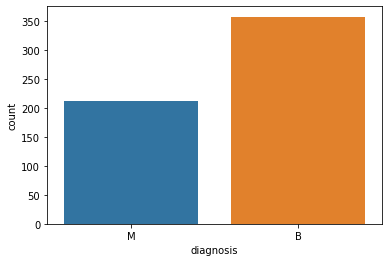

In [132]:
#visualisasi B dan M
sns.countplot(df['diagnosis'], label='count' )

#sns untuk visualisai, label x untuk diagnosis M dan B, sedangkan label y untuk melihat jumlah pasien

In [133]:
#lihat tipe data , yang nantinya membantu,  data mana yang akan kita pakai untuk next step atau encoded
df.dtypes
df.dtypes.shape

(32,)

In [134]:
#data diagnosis merupakan objek, id integer dan lainnya float
#mari kita encode data value nya untuk membuat kategori memakau sklearn
#mengubah data kategori ke nomor , data frame indek pertama yaitu diagnosis, akan kita ubah menjadi nomor dengan .value
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)    #memanggil defenisi M dan B, lalu mengubah ke 0 dan 1 df.iloc[:'1] merupakan data diagnosis arti 1 ke diagnosis
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

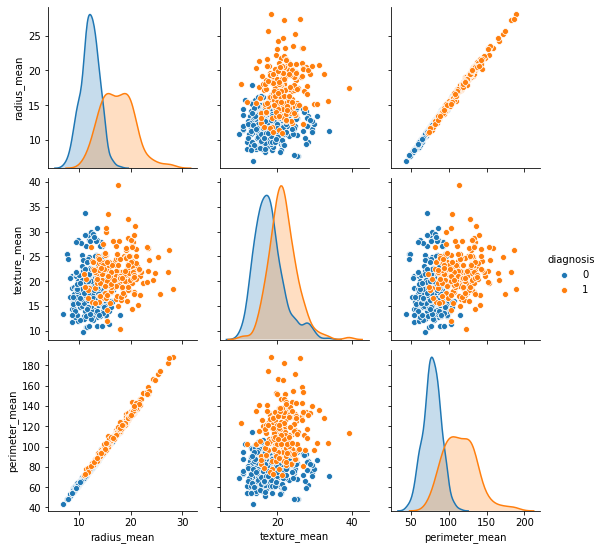

In [135]:
#data diatas data B dan M sudah diganti, M= 1, dan B=0, ingat M adalah ganas, kalo B jinak
#lalu kita membuat grafik plot pasangan indeks ke 1 sampai 5. yaitu diagnosis, radius_mean dll
sns.pairplot(df.iloc[:,1:5], hue ='diagnosis')


In [136]:
#print 5 kolom pertama data
#melihat data diagnosis yang sudah jadi angka 1 dan 0
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [137]:
#mendapatkan korelasi tiap kolom
#dapat kita lihat,korelasi pada tiap kolom, bagaimana satu kolom mempengaruhi kolom lainnya
#dari kode kit amelihat korelasi kolom 1 sampai 11
#contoh, korelai diagnoi dan radius_mean adalah 0,7 berarti radius_mean dan diagnosis saling mempengaruhi
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


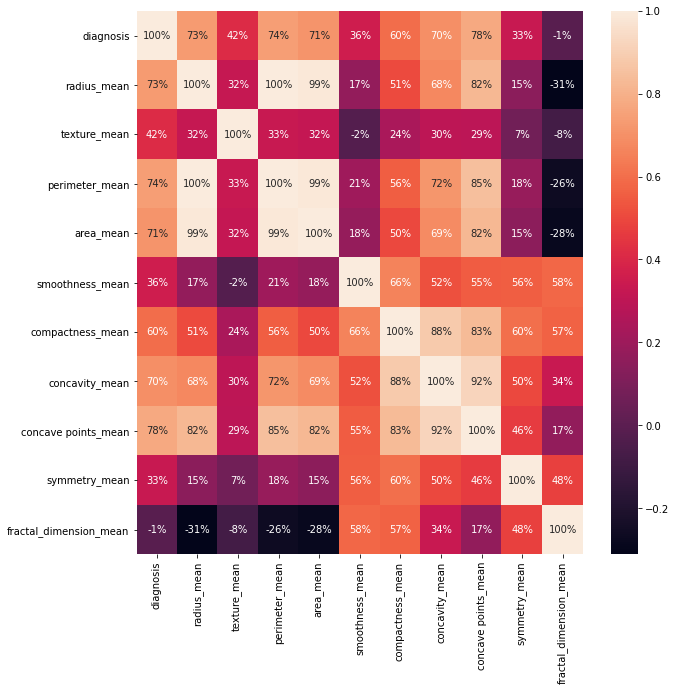

In [138]:
#visualisasi korelasi , keliatan kan contoh radius_mean korelasi nya positif sama diagnosis nilai korelasi nya 0.7 an
#annot true untuk liatin nilai pada gambar
#pake plt, biar gambar gede an
#fmt buat persenan
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt='.0%' )



In [139]:
#membuat model (hmm apa aja boleh) untuk deteksi kanker
#pisasahin data ke data independent x dan dependent y
X=df.iloc[:,2:31].values                        #data colom setelah diagnosis jadi dari indeks ke 2 sampai ke 30 atau trakir
Y=df.iloc[:,1].values                           #data diagnosis , hanya indek 1

type(df)                                        #tipe data adalah pandas, lalu data x dan y adalah array , biar bisa di mainin
                                                # Y , memiliki diagnosis, kasih tau pasien kaneker apa tidak
                                                #indepent X itu features, atau fitur, fitur yang akan membantu mendeterminasi atau memutuskan prg kena kanker apa gak
                                                #dependent data sets itu target value nya

pandas.core.frame.DataFrame

In [0]:
#split data set ke 75% training, dan 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.25, random_state=0)

In [141]:
#skalasisasi scale the data (feature_scaling) untuk membawa semua fitur ke level yang sama hmm, maksudnya di jadiin skala yang spesifik, contoh skala fiturnya 0-100
from sklearn.preprocessing import StandardScaler
sc= StandardScaler ()
X_train=sc.fit_transform(X_train)                         #kita akan melakukan skala pada semua features kita baik data X_train dan data X_test (ciri-ciri kena kanker, pada kasus ini)
X_test=sc.fit_transform(X_test)

X_train, X_test

(array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.69592933,
         -0.36433881,  0.32349851],
        [-0.82835341,  0.15226547, -0.82773762, ..., -1.29277423,
         -1.45036679,  0.62563098],
        [ 1.68277234,  2.18977235,  1.60009756, ...,  0.26255563,
          0.72504581, -0.51329768],
        ...,
        [-1.33114223, -0.22172269, -1.3242844 , ..., -0.78274313,
         -0.98806491, -0.69995543],
        [-1.25110186, -0.24600763, -1.28700242, ..., -1.36015587,
         -1.75887319, -1.56206114],
        [-0.74662205,  1.14066273, -0.72203706, ...,  0.47201917,
         -0.2860679 , -1.24094654]]),
 array([[-0.1839902 ,  0.22170989, -0.11761404, ...,  0.97465513,
          1.40089716,  1.16977773],
        [-0.23927557,  1.20953909, -0.30776593, ..., -0.59768168,
         -0.79588429, -0.81775175],
        [-0.00358531, -0.79326895, -0.07782455, ..., -0.92095006,
         -0.46102846, -1.35426278],
        ...,
        [-0.49242436, -1.50124802, -0.52388569, ..., -

In [0]:
#membuat fungsi untuk prediksi pertama pake logistic regression
def models (X_train,Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log= LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train,Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest= RandomForestClassifier(n_estimators = 10 , criterion='entropy',random_state=0)
  forest.fit(X_train,Y_train)


  #print akurasi model dari data training, 
  print ('[0] Akurasi Training Logistic Regression:', log.score(X_train,Y_train))
  print ('[1] Akurasi Training Decision Tree:', tree.score(X_train,Y_train))
  print ('[2] Akurasi Training Random Forest Classification:', forest.score(X_train,Y_train))


  return log, tree, forest


In [143]:
#memanggil semua model
model=models(X_train,Y_train)

[0] Akurasi Training Logistic Regression: 0.9906103286384976
[1] Akurasi Training Decision Tree: 1.0
[2] Akurasi Training Random Forest Classification: 0.9953051643192489


In [144]:
#test akurasi model pada test data dengan confusion matrix
#m3mbuat semua prediksi testing data dengan for
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
  print ('Model', i)

  cm=confusion_matrix(Y_test,model[0].predict (X_test))    # model prediction pilih nomor 0 1 2, 
        
  TP= cm[0][0]
  FP= cm[0][1]
  FN= cm[1][0]
  TN= cm[1][1]

        
                                                           # dari sini akan keliatan nilai sesungguhnya atau actual value dari X_test dan Y_test 
  print (cm)                                               #keliatan dari hasil, True Positif = 86, False Negatif= 50, false positif = 4, dan false negatif = 3       

  print('Akurasi Testing=',(TP+TN)/(TP+TN+FP+FN))           #untuk akurasi testing  linear regression

Model 0
[[86  4]
 [ 3 50]]
Akurasi Testing= 0.951048951048951
Model 1
[[86  4]
 [ 3 50]]
Akurasi Testing= 0.951048951048951
Model 2
[[86  4]
 [ 3 50]]
Akurasi Testing= 0.951048951048951


In [145]:
#model lainnya untuk akurasi test data
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range (len(model)):
  print ('Model',i)
  print (classification_report(Y_test,model[0].predict(X_test)))
  print (accuracy_score(Y_test,model[0].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951
Model 1
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951
Model 2
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg  

In [146]:
#hasil hampir sama pada test data, pada training data, decision tree paling bagus
#mari melakukan prediksi random forest classifier

prediksi= model[1].predict(X_test)
print (prediksi)
print ()
print (Y_test)       #print actual value nya

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [0]:
#terlihat perbedaan antara prediksi dan hasil sesungguhnya :(    )